<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Lab: Transfer Learning Implementation 


##### Estimated time needed:  30 minutes


In this lab, you will learn to implement transfer learning using a pre-trained model in Keras.

#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.



### Step-by-Step Guide: 

#### Step 1: Setup the Environment 

Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [ ]:
!pip install tensorflow==2.16.2 matplotlib==3.9.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Explanation:
- `tensorflow` is the main library for machine learning in Python.
- `Sequential` is used to create a model with a linear stack of layers.
- `Dense` and `Flatten` are types of layers that we will use in our model.


#### Step 2: Load Pre-trained Model 


In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

#### Step 3: Create and Compile the Model 


In [3]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Create Placeholder Images**


In [ ]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")


#### Step 4: Train the Model 


In [ ]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

#### Step 5: Fine-Tune the Model 


In [ ]:
base_model.summary()

In [ ]:
model.summary()

In [4]:
# Unfreeze the top layers of the base model 

for layer in base_model.layers[-4:]:
    layer.trainable = True 

In [ ]:

# Compile the model again 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model again 
model.fit(train_generator, epochs=10) 

In [ ]:
base_model.layers[-4:]

### Exercises


#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


In [5]:
# Modify the training code to include validation data

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.8250 - val_accuracy: 0.5000 - val_loss: 6.1578
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 6.1578 - val_accuracy: 0.5000 - val_loss: 1.2890
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2890 - val_accuracy: 0.5000 - val_loss: 1.0011
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.0011 - val_accuracy: 1.0000 - val_loss: 0.6657
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6657 - val_accuracy: 0.5000 - val_loss: 0.8705
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8705 - val_accuracy: 0.5000 - val_loss: 0.6559
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6559 - val_accuracy: 0.5000 - val_loss: 0.7047
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7047 - val_accuracy: 0.5000 - val_loss: 0.7563
Epoch 9/25
1/1 ━

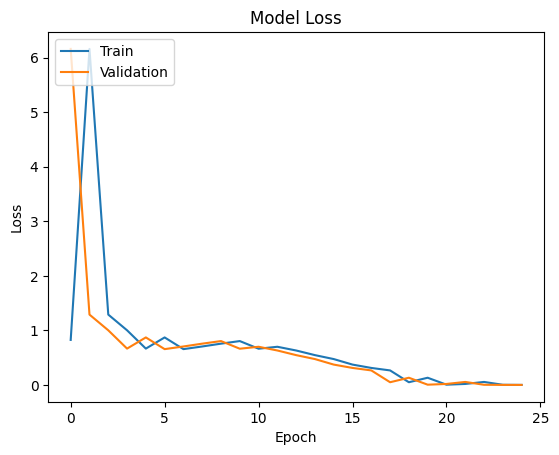

In [7]:

model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

# Plot the training and validation loss for each epoch
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<details>
<summary>Click here for solution</summary> </br>

```python
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Exercise 2: Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 1.0340e-04 - val_accuracy: 0.5000 - val_loss: 0.7776
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7776 - val_accuracy: 0.5000 - val_loss: 3.9331
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.9331 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.1740e-04
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1740e-04 - val_accuracy: 1.0000 - val_loss: 1.2281e-04
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.2281e-04 - val_accuracy: 1.0000 - val_loss: 4.1678e-04
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.1678e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_l

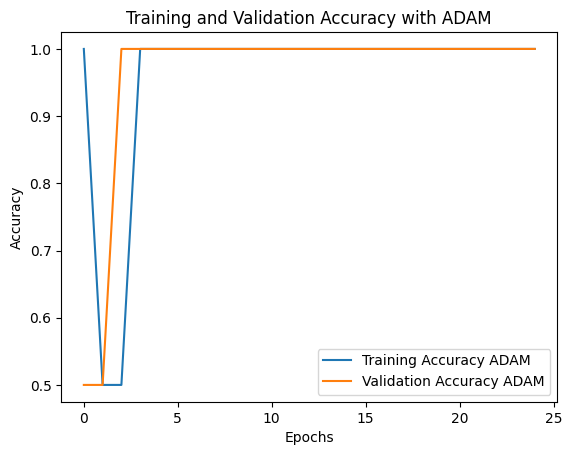

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 1.0340e-04 - val_accuracy: 1.0000 - val_loss: 1.0082e-04
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0082e-04 - val_accuracy: 1.0000 - val_loss: 9.8356e-05
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 9.8356e-05 - val_accuracy: 1.0000 - val_loss: 9.6017e-05
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.6017e-05 - val_accuracy: 1.0000 - val_loss: 9.3784e-05
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.3784e-05 - val_accuracy: 1.0000 - val_loss: 9.1648e-05
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.1648e-05 - val_accuracy: 1.0000 - val_loss: 8.9605e-05
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 8.9605e-05 - val_accuracy: 1.0000 - val_loss: 8.7648e-05
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 8.7648e-0

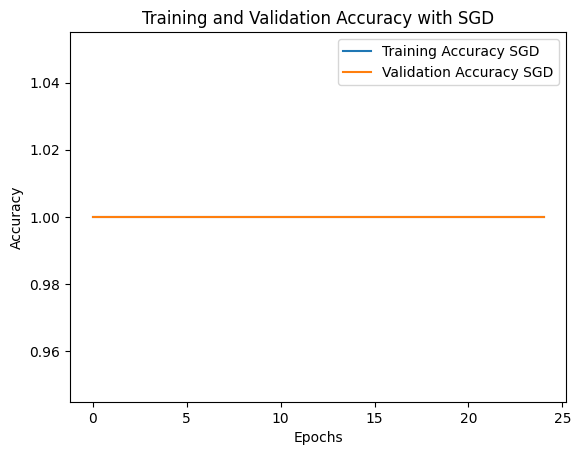

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 1.0340e-04 - val_accuracy: 1.0000 - val_loss: 4.5203e-05
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 4.5203e-05 - val_accuracy: 1.0000 - val_loss: 3.7309e-06
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 3.7309e-06 - val_accuracy: 1.0000 - val_loss: 2.2772e-06
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 2.2772e-06 - val_accuracy: 1.0000 - val_loss: 1.7188e-06
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.7188e-06 - val_accuracy: 1.0000 - val_loss: 1.3963e-06
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.3963e-06 - val_accuracy: 1.0000 - val_loss: 1.1823e-06
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1823e-06 - val_accuracy: 1.0000 - val_loss: 1.0260e-06
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.0260e-0

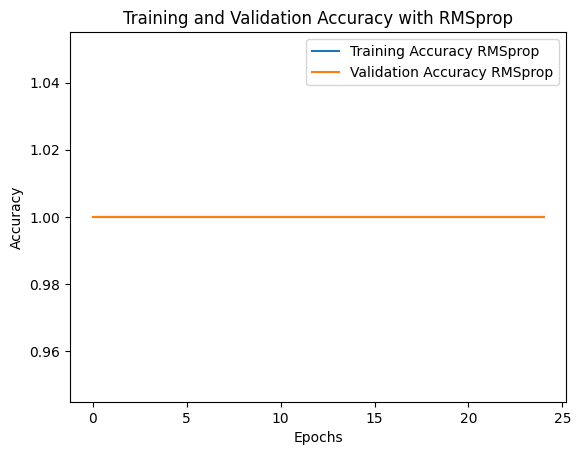

In [8]:

from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with ADAM optimizer
adam_model = reset_model(initial_model)  # Reset model
adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_adam = adam_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for ADAM
plt.plot(history_adam.history['accuracy'], label='Training Accuracy ADAM')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy ADAM')
plt.title('Training and Validation Accuracy with ADAM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0340e-04 - val_accuracy: 0.5000 - val_loss: 0.7776
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7776 - val_accuracy: 0.5000 - val_loss: 3.9331
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.9331 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.1740e-04
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1740e-04 - val_accuracy: 1.0000 - val_loss: 1.2281e-04
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.2281e-04 - val_accuracy: 1.0000 - val_loss: 4.1678e-04
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.1678e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_l

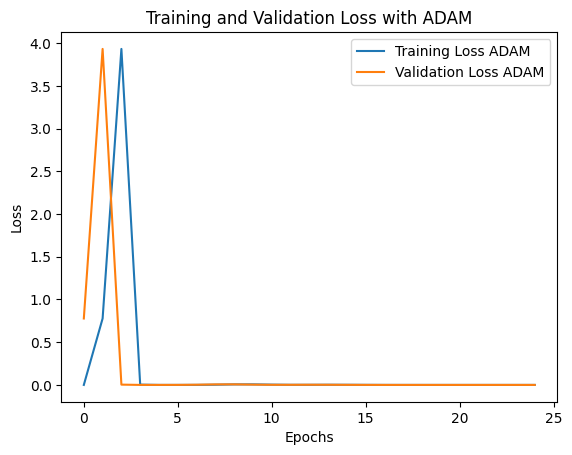

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0340e-04 - val_accuracy: 1.0000 - val_loss: 1.0082e-04
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.0082e-04 - val_accuracy: 1.0000 - val_loss: 9.8356e-05
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.8356e-05 - val_accuracy: 1.0000 - val_loss: 9.6017e-05
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.6017e-05 - val_accuracy: 1.0000 - val_loss: 9.3784e-05
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.3784e-05 - val_accuracy: 1.0000 - val_loss: 9.1648e-05
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 9.1648e-05 - val_accuracy: 1.0000 - val_loss: 8.9605e-05
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 8.9605e-05 - val_accuracy: 1.0000 - val_loss: 8.7648e-05
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 8.7648e-0

KeyboardInterrupt: 

In [10]:

from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with ADAM optimizer
adam_model = reset_model(model)  # Reset model
adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_adam = adam_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for ADAM
plt.plot(history_adam.history['loss'], label='Training Loss ADAM')
plt.plot(history_adam.history['val_loss'], label='Validation Loss ADAM')
plt.title('Training and Validation Loss with ADAM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Experiment with SGD optimizer
sgd_model = reset_model(model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['loss'], label='Training Loss SGD')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss SGD')
plt.title('Training and Validation Loss with SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=25, validation_data=val_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['loss'], label='Training Loss RMSprop')
plt.plot(history_rmsprop.history['val_loss'], label='Validation Loss RMSprop')
plt.title('Training and Validation Loss with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Exercise 3: Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


In [ ]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

<details>
<summary>Click here for solution</summary> </br>

```python
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


### Summary

By completing these exercises, students will:

1. Visualize the training and validation loss to gain insights into the training process.
2. Experiment with different optimizers to understand their impact on model performance.
3. Evaluate the fine-tuned model on an unseen test set to assess its generalization capability.


#### Conclusion

Congratulations! In this lab, you have successfully implemented transfer learning using a pre-trained model in Keras. This lab exercise demonstrated how to train and fine-tune the model by unfreezing some of the layers.


Copyright © IBM Corporation. All rights reserved.
